# Data Mining Versuch Document Classification
* Autor: Prof. Dr. Johannes Maucher
* Datum: 06.11.2015

[Übersicht Ipython Notebooks im Data Mining Praktikum](Data Mining Praktikum.ipynb)

# Einführung
## Lernziele:
In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* Dokumentklassifikation: Klassifikation von Dokumenten, insbesondere Emails und RSS Feed
* Naive Bayes Classifier: Weit verbreitete Klassifikationsmethode, welche unter bestimmten Randbedingungen sehr gut skaliert.


## Theorie zur Vorbereitung
### Parametrische Klassifikation und Naive Bayes Methode
Klassifikatoren müssen zu einer gegebenen Eingabe $\underline{x}$ die zugehörige Klasse $C_i$ bestimmen. Mithilfe der Wahrscheinlichkeitstheorie kann diese Aufgabe wie folgt beschrieben werden: Bestimme für alle möglichen Klassen $C_i$ die bedingte Wahrscheinlichkeit $P(C_i | \underline{x})$, also die Wahrscheinlichkeit, dass die gegebene Eingabe $\underline{x}$ in Klasse $C_i$ fällt. Wähle dann die Klasse aus, für welche diese Wahrscheinlichkeit maximal ist.

Die Entscheidungsregeln von Klassifikatoren können mit Methoden des ""überwachten Lernens"" aus Trainingsdaten ermittelt werden. Im Fall des **parametrischen Lernens** kann aus den Trainingsdaten die sogenannte **Likelihood-Funktion** $p(\underline{x} \mid C_i)$ bestimmt werden. _Anmerkung:_ Allgemein werden mit $p(...)$ kontinuierliche Wahrscheinlichkeitsfunktionen und mit $P(...)$ diskrete Wahrscheinlichkeitswerte bezeichnet. 

Mithilfe der **Bayes-Formel**
$$
P(C_i \mid \underline{x}) = \frac{p(\underline{x} \mid C_i) \cdot P(C_i)}{p(\underline{x})}
$$

kann aus der Likelihood die **a-posteriori-Wahrscheinlichkeit $P(C_i \mid \underline{x})$** berechnet werden. Darin wird $P(C_i)$ die **a-priori-Wahrscheinlichkeit** und $p(\underline{x})$ die **Evidenz** genannt. Die a-priori-Wahrscheinlichkeit kann ebenfalls aus den Trainingsdaten ermittelt werden. Die Evidenz ist für die Klassifikationsentscheidung nicht relevant, da sie für alle Klassen $C_i$ gleich groß ist.

Die Berechnung der Likelihood-Funktion $p(\underline{x} \mid C_i)$ ist dann sehr aufwendig, wenn $\underline{x}=(x_1,x_2,\ldots,x_Z)$ ein Vektor von voneinander abhängigen Variablen $x_i$ ist. Bei der **Naive Bayes Classification** wird jedoch von der vereinfachenden Annahme ausgegangen, dass die Eingabevariabeln $x_i$ voneinander unabhängig sind. Dann vereinfacht sich die bedingte Verbundwahrscheinlichkeits-Funktion $p(x_1,x_2,\ldots,x_Z \mid C_i)$ zu:

$$
p(x_1,x_2,\ldots,x_Z \mid C_i)=\prod\limits_{j=1}^Z p(x_j | C_i)
$$

### Anwendung der Naive Bayes Methode in der Dokumentklassifikation
Auf der rechten Seite der vorigen Gleichung stehen nur noch von den jeweils anderen Variablen unabhängige bedingte Wahrscheinlichkeiten. Im Fall der Dokumentklassifikation sind die einzelnen Worte die Variablen, d.h. ein Ausdruck der Form $P(x_j | C_i)$ gibt an mit welcher Wahrscheinlichkeit ein Wort $x_j=w$ in einem Dokument der Klasse $C_i$ vorkommt. 
Die Menge aller Variablen $\left\{x_1,x_2,\ldots,x_Z \right\}$ ist dann die Menge aller Wörter im Dokument. Damit gibt die linke Seite in der oben gegebenen Gleichung die _Wahrscheinlichkeit, dass die Wörter $\left\{x_1,x_2,\ldots,x_Z \right\}$ in einem Dokument der Klasse $C_i$ vorkommen_ an.

Für jedes Wort _w_ wird aus den Trainingsdaten die Wahrscheinlichkeit $P(w|G)$, mit der das Wort in Dokumenten der Kategorie _Good_ und die Wahrscheinlichkeit $P(w|B)$ mit der das Wort in Dokumenten der Kategorie _Bad_ auftaucht ermittelt. Trainingsdokumente werden in der Form

$$
tD=(String,Category)
$$
eingegeben. 

Wenn 

* mit der Variable $fc(w,cat)$ die Anzahl der Trainingsdokumente in Kategorie $cat$ in denen das Wort $w$ enthalten ist
* mit der Variable $cc(cat)$ die Anzahl der Trainingsdokumente in Kategorie $cat$ 

gezählt wird, dann ist 

$$
P(w|G)=\frac{fc(w,G)}{cc(G)} \quad \quad P(w|B)=\frac{fc(w,B)}{cc(B)}.
$$

Wird nun nach der Eingabe von $L$ Trainingsdokumenten ein neu zu klassifizierendes Dokument $D$ eingegeben und sei $W(D)$ die Menge aller Wörter in $D$, dann berechnen sich unter der Annahme, dass die Worte in $W(D)$ voneinander unabhängig sind (naive Bayes Annahme) die a-posteriori Wahrscheinlichkeiten zu:

$$
P(G|D)=\frac{\left( \prod\limits_{w \in W(D)} P(w | G) \right) \cdot P(G)}{p(D)}
$$
und
$$
P(B|D)=\frac{\left( \prod\limits_{w \in W(D)} P(w | B) \right) \cdot P(B)}{p(D)}.
$$

Die hierfür notwendigen a-priori-Wahrscheinlichkeiten berechnen sich zu 

$$
P(G)=\frac{cc(G)}{L}
$$
und
$$
P(B)=\frac{cc(B)}{L}
$$

Die Evidenz $p(D)$ beeinflusst die Entscheidung nicht und kann deshalb ignoriert werden.




## Vor dem Versuch zu klärende Fragen


1.1 Wie wird ein Naive Bayes Classifier trainiert? 

Der Naive Bayes-Algorithmus ist ein probabilistischer Klassifikationsalgorithmus. Er berechnet für jede Klasse eine Wahrscheinlichkeit, dass die Beobachtung (x1,…,xn) zu dieser Klasse Ci gehört. Wie der Name schon sagt hat er etwas mit dem Bayes Theorem zutun. Bei dem Satz von Bayes geht es um bedingte Wahrscheinlichkeiten, also die Wahrscheinlichkeit eines Ereignisses A, wenn ein Ereignis B eingetreten ist.

* Schritt 1: Sortiere die Dokumente im Datensatz nach Klassen

* Schritt 2: Teile Datensatz in Trainings- und Testsätze 

* Schritt 3: Zähle jedes Wort der Klassen und schreibe ihre Häufigkeit in eine Tabelle

*  Schritt 4: Mache Vorhersagen unter Verwendeung der Naive Bayes'sche Gleichung, um die Wahrscheinlichkeit für jede Klasse zu berechnen. Die Klasse mit der höchsten Wahrscheinlichkeit kann als wahrscheinlichste Klassifizierung zurückgegeben werden.


1.2 Was muss beim Training für die spätere Klassifikation abgespeichert werden?

Alle Worte oder Terme eines Textes stellen lernbare Merkmale, bzw. Features dar. Die Merkmalwertewerte entsprechen dabei der absoluten Häufigkeit eines Terms innerhalb eines Dokumentes, welche gespeichert werden, um anhand der errechneten Wahrscheinlichkeiten eine spätere Klassifation neuer Dokumente zu ermöglichen. Zudem muss für die Klassifikation das Label der Klasse abgespeichert werden. 

Um zu sehen wie gut ein Modell nach dem Testen ist, kann damit verglichen werden ob das Modell die Klassen richtig erkannt hat oder nicht.

Beim Training wird für jedes Wort die Häufigkeit bestimmt mit der es in den Dokumenten auftaucht. Daraus ergeben sich dann Entscheidungsregeln, die für die spätere Klassifizierung abgespeichert werden.


2. Wie teilt ein Naiver Bayes Classifier ein neues Dokument ein?


Der Text wird in seine Wörter aufgespaltet. Es wird die Wahrscheinlichkeit $
P(C_i \mid \underline{x})$, dass ein Wort xj zu einer Klasse Ci gehört, berechnet. Anschließend werden alle Wahrscheinlichkeiten der gleichen Klasse miteinander multipliziert und die Klasse mit dem resultierenden höchsten Produkt wird als Klassifizierung des Dokuments ausgegeben.

3. Welche naive Annahme liegt dem Bayes Classifier zugrunde? Ist diese Annahme im Fall der Dokumentklassifikation tatsächlich gegeben?


Es ist "naiv", weil es die Wahrscheinlichkeit, dass jedes Wort in einem Dokument vorkommt, so behandelt, als sei sie unabhängig von der Wahrscheinlichkeit, dass ein anderes Wort vorkommt. Diese Annahme trifft selten bei Dokumente zu, da einige Wörter in der Realität immer dazu neigen mit anderen Wörtern zu korrelieren. Außerdem verändert sich durch den Kontext oft die Bedeutung der Wörter und dadurch die Klassifikation.

4. Betrachten Sie die Formeln für die Berechnung von $P(G|D)$ und $P(B|D)$. Welches Problem stellt sich ein, wenn in der Menge $W(D)$ ein Wort vorkommt, das nicht in den Trainingsdaten der Kategorie $G$ vorkommt und ein anderes Wort aus $W(D)$ nicht in den Trainingsdaten der Kategorie $B$ enthalten ist? Wie könnte dieses Problem gelöst werden? 


Wenn ein Wort im Eingabetext vorhanden ist, nicht jedoch in den Trainingsdaten, ist die Wahrscheinlichkeit Null. Das Produkt wird daraus folgend auch Null ergeben was dann eine Endwahrscheinlichkeit von Null zur Folge haben wird.

Dieses Problem kann man mit Hilfe der so genannten Laplace-Glättung lösen. 
Man addieret 1 zu jeder Zählung, so dass sie nie Null wird. Um dies auszugleichen, addieret man die Anzahl der möglichen Wörter zum Divisor, so dass die Division nie größer als 1 sein wird.

# Durchführung
## Feature Extraction/ -Selection

**Aufgabe:**
Implementieren Sie eine Funktion _getwords(doc)_, der ein beliebiges Dokument in Form einer String-Variablen übergeben wird. In der Funktion soll der String in seine Wörter zerlegt und jedes Wort in _lowercase_ transformiert werden. Wörter, die weniger als eine untere Grenze von Zeichen (z.B. 3) oder mehr als eine obere Grenze von Zeichen (z.B. 20) enthalten, sollen ignoriert werden. Die Funktion soll ein dictionary zurückgeben, dessen _Keys_ die Wörter sind. Die _Values_ sollen für jedes Wort zunächst auf $1$ gesetzt werden.

**Tipp:** Benutzen Sie für die Zerlegung des Strings und für die Darstellung aller Wörter mit ausschließlich kleinen Buchstaben die Funktionen _split(), strip('sep')_ und _lower()_ der Klasse _String_.  


In [324]:
from collections import defaultdict
import pandas as pd

def getwords(doc):
    word_dict = {x.strip(';:,.!?') : 1 for x in doc.lower().split() if (len(x.strip(';:,.!?')) in range(3,20))}
    return word_dict

## Classifier

**Aufgabe:**
Implementieren Sie den Naive Bayes Classifier für die Dokumentklassifikation. Es bietet sich an die Funktionalität des Klassifikators und das vom Klassifikator gelernte Wissen in einer Instanz einer Klasse _Classifier_ zu kapseln. In diesem Fall kann wie folgt vorgegangen werden:

* Im Konstruktor der Klasse wird je ein Dictionary für die Instanzvariablen _fc_ und _cc_ (siehe oben) initialisiert. Dabei ist _fc_ ein verschachteltes Dictionary. Seine Keys sind die bisher gelernten Worte, die Values sind wiederum Dictionaries, deren Keys die Kategorien _Good_ und _Bad_ sind und deren Values zählen wie häufig das Wort bisher in Dokumenten der jeweiligen Kategorie auftrat. Das Dictionary _cc_ hat als Keys die Kategorien _Good_ und _Bad_. Die Values zählen wie häufig Dokumente der jeweiligen Kategorien bisher auftraten.
* Im Konstruktor wird ferner der Instanzvariablen _getfeatures_ die Funktion _getwords()_ übergeben. Die Funktion _getwords()_ wurde bereits zuvor ausserhalb der Klasse definiert. Sinn dieses Vorgehens ist, dass andere Varianten um Merkmale aus Dokumenten zu extrahieren denkbar sind. Diese Varianten könnten dann ähnlich wie die _getwords()_-Funktion ausserhalb der Klasse definiert und beim Anlegen eines _Classifier_-Objekts der Instanzvariablen _getfeatures_ übergeben werden.  
* Der Methode _incf(self,f,cat)_ wird ein Wort _f_ und die zugehörige Kategorie _cat_ des Dokuments in welchem es auftrat übergeben. In der Methode wird der _fc_-Zähler angepasst.
* Der Methode _incc(self,cat)_ wird die Kategorie _cat_ des gerade eingelesenen Dokuments übergeben. In der Methode wird der _cc_-Zähler angepasst.
* Die Methode _fcount(self,f,cat)_ gibt die Häufigkeit des Worts _f_ in den Dokumenten der Kategorie _cat_ zurück.
* Die Methode _catcount(self,cat)_ gibt die Anzahl der Dokumente in der Kategorie _cat_ zurück.
* Die Methode _totalcount(self)_ gibt die Anzahl aller Dokumente zurück.
* Der Methode _train(self,item,cat)_ wird ein neues Trainingselement, bestehend aus der Betreffzeile (_item_) und der entsprechenden Kategorisierung (_cat_) übergeben. Der String _item_ wird mit der Instanzmethode _getfeatures_ (Diese referenziert _getwords()_) in Worte zerlegt. Für jedes einzelne Wort wird dann _incf(self,f,cat)_ aufgerufen. Ausserdem wird für das neue Trainingsdokument die Methode _incc(self,cat)_ aufgerufen.
* Die Methode _fprob(self,f,cat)_ berechnet die bedingte Wahrscheinlichkeit $P(f | cat)$ des Wortes _f_ in der Kategorie _cat_ entsprechend der oben angegebenen Formeln, indem sie den aktuellen Stand des Zählers _fc(f,cat)_ durch den aktuellen Stand des Zählers _cc(cat)_ teilt.   
* Die Methode _fprob(self,f,cat)_ liefert evtl. ungewollt extreme Ergebnisse, wenn noch wenig Wörter im Klassifizierer verbucht sind. Kommt z.B. ein Wort erst einmal in den Trainingsdaten vor, so wird seine Auftrittswahrscheinlichkeit in der Kategorie in welcher es nicht vorkommt gleich 0 sein. Um extreme Wahrscheinlichkeitswerte im Fall noch selten vorkommender Werte zu vermeiden, soll zusätzlich zur Methode _fprob(self,f,cat)_ die Methode _weightedprob(self,f,cat)_ implementiert und angewandt werden. Der von ihr zurückgegebene Wahrscheinlichkeitswert könnte z.B. wie folgt berechnet werden:$$wprob=\frac{initprob+count \cdot fprob(self,f,cat)}{1+count},$$ wobei $initprob$ ein initialer Wahrscheinlichkeitswert (z.B. 0.5) ist, welcher zurückgegeben werden soll, wenn das Wort noch nicht in den Trainingsdaten aufgetaucht ist. Die Variable $count$ zählt wie oft das Wort $f$ bisher in den Trainingsdaten auftrat. Wie zu erkennen ist, nimmt der Einfluss der initialen Wahrscheinlichkeit ab, je häufiger das Wort in den Trainingsdaten auftrat.
* Nach dem Training soll ein beliebiges neues Dokument (Text-String) eingegeben werden können. Für dieses soll mit der Methode _prob(self,item,cat)_ die a-posteriori-Wahrscheinlichkeit $P(cat|item)$ (Aufgrund der Vernachlässigung der Evidenz handelt es sich hierbei genaugenommen um das Produkt aus a-posteriori-Wahrscheinlichkeit und Evidenz), mit der das Dokument _item_ in die Kategorie _cat_ fällt berechnet werden. Innerhalb der Methode _prob(self,item,cat)_ soll zunächst die Methode _weightedprob(self,f,cat)_ für alle Wörter $f$ im Dokument _item_ aufgerufen werden. Die jeweiligen Rückgabewerte von _weightedprob(self,f,cat)_ werden multipliziert. Das Produkt der Rückgabewerte von _weightedprob(self,f,cat)_ über alle Wörter $f$ im Dokument muss schließlich noch mit der a-priori Wahrscheinlichkeit $P(G)$ bzw. $P(B)$ entsprechend der oben aufgeführten Formeln multipliziert werden. Das Resultat des Produkts wird an das aufrufende Programm zurück gegeben, die Evidenz wird also vernachlässigt (wie oben begründet).



Ein Dokument _item_ wird schließlich der Kategorie _cat_ zugeteilt, für welche die Funktion _prob(self,item,cat)_ den höheren Wert zurück gibt. Da die Rückgabewerte in der Regel sehr klein sind, werden in der Regel folgende Werte angezeigt. Wenn mit $g$ der Rückgabewert von _prob(self,item,cat=G)_ und mit $b$ der Rückgabewert von _prob(self,item,cat=B)_ bezeichnet wird dann ist die Wahrscheinlichkeit, dass $item$ in die Kategorie $G$ fällt, gleich:
$$
\frac{g}{g+b}
$$
und die Wahrscheinlichkeit, dass $item$ in die Kategorie $B$ fällt, gleich:
$$
\frac{b}{g+b}
$$

In [325]:
class Classifier:

    """
    - ein dictionary mit instanzvariable fc und cc initialisiert
    - fc ist ein verschachteltes dictionary, 
      keys sind die bisher gelernten Worte, values zählen wie häufig Worte vorkamen
    - getfeatures wird die Funktion getwords() übergeben und referenziert damit diese
    """
    def __init__(self, getfeatures, categories):
        self.fc = defaultdict(lambda: defaultdict(int))
        self.cc = defaultdict(int)
        self.getfeatures = getfeatures
        self.categorie = categories 
    
    """
    - wird ein Wort f übergeben
    - wird eine zugehörige Kategorie cat übergeben
    - der fc Zähler wird angepasst
    """
    def incf(self, f, cat):
        if(f in self.fc):
            self.fc[f][cat] = self.fc[f][cat]+1
        else:
            tempDict = {}
            for x in self.categorie:
                tempDict[x] = 0
            self.fc[f] = tempDict
            self.fc[f][cat]=self.fc[f][cat]+1
    
    """
    - wird ein Wort und die zugehörige Kategorie cat übergeben
    - hierüber wird der klassen-eigene cc Zähler angepasst
    """
    def incc(self, cat):
        self.cc[cat] = self.cc[cat]+1
    
    """
    - gibt Häufigkeit des wortes f der Kategroie cat zurück
    """
    def fcount(self, f, cat):
        if(f in self.fc):
            return self.fc[f][cat]
        else:
            return 0
    """
    - gibt die Anzahl der Dokumente der Kategorie cat zurück
    """
    def catcount(self, cat):
        return self.cc[cat]
    
    """
    - gibt Anzahl aller Dokumente zurück
    """
    def totalcount(self):
        return sum(self.cc.values())

    """
    - wird ein neues Trainingselement mit
      Betreffzeile (item) und Kategorisierung (cat) übergeben
    - der String item wird mit der Instanzmethode getfeatures in Worte zerlegt.
    - Aufruf von incf(f, cat) je feature/Wort
    """
    def train(self, item, cat):
        features = self.getfeatures(item)
        for f in features:
            self.incf(f, cat)
        self.incc(cat)    

    """
    - berechnet die bedingte Wahrscheinlichkeit  P(f|cat)  des Wortes f in der Kategorie cat
    - je geringer die Anzahl an Worten, desto extremer das ergebnis
    - als ausgleich hierfür wird weightedprob implementiert
    """
    def fprob(self, f, cat):
        return self.fcount(f, cat)/self.catcount(cat)

    """
    - berechnet einen wahrscheinlichkeitswert
    - initProb ist ein initialier Wahrscheinlichkeitswert
    - je häufiger das wort vorkommt, desto mehr nimmt 
    """
    def weightedprob(self, f, cat):
        initProb = 0.5
        if(f in self.fc):
            count = sum(self.fc[f].values())
        else:
            count = 0
        return (initProb + count * self.fprob(f,cat))/(1+count)

    """
    - Übergabe beliebigen Textdokumentes
    - Berechnung der bedingten Wahrscheinlichkeit mit
      a-postpriori-Wahrscheinlichkeit P(C/X) mit dem das neue Dokument X
      in die Kategorie y fällt
    """
    def prob(self, item, cat):
        features = self.getfeatures(item)
        produkt = 1
        for f in features:
            produkt = produkt * self.weightedprob(f, cat)
        return produkt * (self.catcount(cat)/self.totalcount())    
    
    """
    - Kategorisierung des dokumentes
    """
    def categorise(self, item, catA, catB):
        a = self.prob(item, catA)
        b = self.prob(item, catB)
        if a>b:
            return catA
        else:
            return catB    

## Test

**Aufgabe:**
Instanzieren Sie ein Objekt der Klasse _Classifier_ und übergeben Sie der _train()_ Methode dieser Klasse mindestens 8 kategorisierte Dokumente (Betreffzeilen als Stringvariablen zusammen mit der Kategorie Good oder Bad). Definieren Sie dann ein beliebig neues Dokument und berechnen Sie für dieses die Kategorie, in welches es mit größter Wahrscheinlichkeit fällt. Benutzen Sie für den Test das in 
[NLP Vorlesung Document Classification](https://www.mi.hdm-stuttgart.de/mib/studium/intern/skripteserver/skripte/NaturalLanguageProcessing/WS1415/03TextClassification.pdf)
ausführlich beschriebene Beispiel zu implementieren. Berechnen Sie die Klassifikatorausgabe des Satzes _the money jumps_.

In [326]:
testDict = {"nobody owns the water": "good", 
            "the quick rabbit jumps fences":"good",
           "buy pharmaceuticals now":"bad",
           "make quick money at the online casino":"bad",
           "the quick brown fox jumps":"good",
           "next meeting is at night":"good",
           "meeting with your superstar":"bad",
           "money like water":"bad"}

In [327]:
classifier_model = Classifier(getwords, ['good', 'bad'])

for key, value in testDict.items():
    classifier_model.train(key, value)

print("...Gehört zu Klasse: ", classifier_model.categorise("the money jumps","good","bad"))

...Gehört zu Klasse:  good


## Klassifikation von RSS Newsfeeds
Mit dem unten gegebenen Skript werden Nachrichten verschiedener Newsserver geladen und als String abgespeichert.

**Aufgaben:**
1. Trainieren Sie Ihren Naive Bayes Classifier mit allen Nachrichten der in den Listen _trainTech_ und _trainNonTech_ definierten Servern. Weisen Sie für das Training allen Nachrichten aus _trainTech_ die Kategorie _Tech_ und allen Nachrichten aus _trainNonTech_ die Kategorie _NonTech_ zu.

In [328]:
!pip install feedparser
import feedparser

In [329]:
def stripHTML(h):
    p=''
    s=0
    for c in h:
        if c=='<': s=1
        elif c=='>':
            s=0
            p+=' '
        elif s==0:
            p+=c
    return p

In [330]:
TextDict = {}
testList = []
testVerificationDict = {}

countnews = {}
countnews['tech'] = 0
countnews['nontech'] = 0
countnews['test'] = 0

In [331]:
# trainTech

trainTech=['http://rss.chip.de/c/573/f/7439/index.rss',
           #'http://feeds.feedburner.com/netzwelt',
           'http://rss1.t-online.de/c/11/53/06/84/11530684.xml',
           'http://www.computerbild.de/rssfeed_2261.xml?node=13',
           'http://www.heise.de/newsticker/heise-top-atom.xml']

print ("--------------------News from trainTech------------------------")
for feed in trainTech:
    print ("*"*30)
    print (feed)
    f=feedparser.parse(feed)
    for e in f.entries:
        print ('\n---------------------------')
        fulltext=stripHTML(e.title+' '+e.description)
        print (fulltext)
        countnews['tech']+=1
        
        TextDict.update( {fulltext: "Tech"} )

--------------------News from trainTech------------------------
******************************
http://rss.chip.de/c/573/f/7439/index.rss
******************************
http://rss1.t-online.de/c/11/53/06/84/11530684.xml

---------------------------
Dieser Browser-Test zeigt, ob Ihr Router sicher ist Ungesicherte Router können über das Internet zum Einfallstor für Angreifer werden. Ist Ihr Router ausreichend geschützt? Ein kostenloser Browser-Test schafft Klarheit. 
Offen wie ein Scheunentor oder verschwiegen wie ein Grab? Wer wissen möchte, ob sein Router und das darauf laufende Firewall-Programm das Heimnetzwerk gut gegen mögliche Angreifer abschirmen, sollte einen Netzwerkcheck starten –...

---------------------------
Tabelleninhalt in Excel in separate Spalten aufteilen Wer Excel nutzt und bestimmte Daten einer Tabelle aufteilen will, braucht nur wenige Handgriffe. Wir zeigen, was Sie tun müssen. 
Tabelleninhalte wie zum Beispiel Name, Vorname und Adresse lassen sich in Microsofts P


---------------------------
tvOS 14: Apple TV mit vielen neuen Funktionen Der iPhone-Hersteller verpasst der TV-Streamingbox Apple TV erhält ein Update: COMPUTER BILD erklärt, was tvOS 14 an neuen Funktionen mit sich bringt.

---------------------------
iOS 14 offiziell: Das bringt das große iPhone-Update Apple hat iOS 14, das neuste iUpdate des iPhone-Betriebssystems, offiziell vorgestellt. COMPUTER BILD zeigt die wichtigsten Neuerungen.

---------------------------
Apple AirPods: Update macht die Kopfhörer besser Nicht nur iPhones, iPads und Macs bekommen im Zuge der WWDC neue Funktionen, auch die AirPods erhalten ein Update. Darum geht es.

---------------------------
CarKeys: Das iPhone wird zum Autoschlüssel Auf der WWDC hat Apple eine neue Funktion für iOS 14 vorgestellt: Mit CarKeys wird das iPhone zum Autoschlüssel für die ganze Familie.

---------------------------
iPadOS 14 ist da: Diese iPad-Funktionen sind neu Auf der WWDC hat Apple einen Ausblick auf iPadOS 14 gegeben. Wa

In [332]:
# trainNonTech

trainNonTech=['http://newsfeed.zeit.de/index',
              'http://newsfeed.zeit.de/wirtschaft/index',
              'http://www.welt.de/politik/?service=Rss',
              'http://www.spiegel.de/schlagzeilen/tops/index.rss',
              'http://www.sueddeutsche.de/app/service/rss/alles/rss.xml',
              'http://www.faz.net/rss/aktuell/'
              ]

print ("--------------------News from trainNonTech------------------------")
for feed in trainNonTech:
    print ("*"*30)
    print (feed)
    f=feedparser.parse(feed)
    for e in f.entries:
        print ('\n---------------------------')
        fulltext=stripHTML(e.title+' '+e.description)
        print (fulltext)
        countnews['nontech']+=1
        
        TextDict.update( {fulltext: "NonTech"} )

--------------------News from trainNonTech------------------------
******************************
http://newsfeed.zeit.de/index

---------------------------
Stuttgart: Erklärungen jenseits von Alkohol und Testosteron     In Stuttgart lebt man gut und glaubt, das Glück erfunden zu haben. Aber irgendetwas muss fehlen, wenn dort nun einige ihre Erfüllung in sinnfreier Randale suchen.

---------------------------
Krawalle in Stuttgart: Warum diese Eskalation?     Augenzeugen, Videos und die Polizei helfen dabei, die Krawalle in Stuttgart zu rekonstruieren. Jugendliche dort sagen: "Manche wollten halt ein bisschen Amerika spielen."

---------------------------
Corona-Ausbruch: Zahl infizierter Tönnies-Werksmitarbeiter steigt auf über 1.500     Nach dem Corona-Ausbruch im Tönnies-Werk sind Fachleute vor Ort, um Empfehlungen zur Eindämmung abzugeben. Der Landrat hält einen regionalen Lockdown für wahrscheinlich.

---------------------------
Umstrittene Kolumne: Kanzlerin schaltet sich in Stre


---------------------------
Die 1,9-Milliarden-Euro-Frage Die Finanzlücke von fast zwei Milliarden Euro bei Wirecard wirft viele Fragen auf: Wer hat geschlampt? Droht den Managern Haft? Und wie verschwinden eigentlich 1,9 Milliarden? Alles Wichtige zum Wirecard-Skandal. Der Überblick.

---------------------------
Stuttgart-Krawalle: Staatsanwaltschaft wirft 16-Jährigem versuchten Totschlag vor Er soll einem am Boden liegenden Studenten gezielt gegen den Kopf getreten haben: Nach den Randalen in Stuttgart wird gegen einen 16-Jährigen wegen versuchten Totschlags ermittelt.

---------------------------
Andreas Kalbitz: AfD-Rechtsausleger mischt wieder im Vorstand mit Er ist im Visier des Verfassungsschutzes, sein Fall spaltet die Partei: AfD-Rechtsausleger Andreas Kalbitz hat sich die Mitgliedschaft vor Gericht zurückgeholt - und arbeitet wieder im Vorstand mit. Das heizt den Machtkampf an.

---------------------------
Anti-China-Stimmung in Europa, USA, Indien: Steht ein neuer Kalter Kr

In [333]:
# test

test=["http://rss.golem.de/rss.php?r=sw&feed=RSS0.91",
          'http://newsfeed.zeit.de/politik/index',  
          'http://www.welt.de/?service=Rss'
           ]

print ("--------------------News from test------------------------")
for feed in test:
    print ("*"*30)
    print (feed)
    f=feedparser.parse(feed)
    for e in f.entries:
        print ('\n---------------------------')
        fulltext=stripHTML(e.title+' '+e.description)
        print (fulltext)
        countnews['test']+=1
        
        testList.append(fulltext)
        
        if feed == test[0]:
            testVerificationDict.update( {fulltext: "Tech"} )
        else:
            testVerificationDict.update( {fulltext: "NonTech"} )

--------------------News from test------------------------
******************************
http://rss.golem.de/rss.php?r=sw&feed=RSS0.91

---------------------------
Desktop-Betriebssystem: MacOS Big Sur führt neue Oberfläche ein Apples Betriebssystem MacOS Big Sur wurde optisch generalüberholt. Kompakte Icons, andere Layouts und neue Bedienelemente erinnern an iPadOS. ( MacOS ,  Apple )  

---------------------------
iPad-Betriebssystem: iPadOS 14 macht Platz am Rand iPadOS 14 heißt das neue Betriebssystem für iPads, das mit dem Bildschirmplatz ökonomischer umgeht. So wird die Grenze zu MacOS immer durchlässiger. ( iPad ,  Apple )  

---------------------------
Mobiles Betriebssystem: iOS 14 erfindet Homescreen, Autoschlüssel und Apps neu Apple hat mit iOS 14 die nächste Generation seines mobilen Betriebssystems für iPhones vorgestellt. ( iOS ,  Apple )  

---------------------------
End of Life: Flash Player soll sich selbst zerstören Die Software soll einen Selbstzerstörungsmechanism


---------------------------
Corona-Ausbruch: Zahl infizierter Tönnies-Werksmitarbeiter steigt auf über 1.500     Nach dem Corona-Ausbruch im Tönnies-Werk sind Fachleute vor Ort, um Empfehlungen zur Eindämmung abzugeben. Der Landrat hält einen regionalen Lockdown für wahrscheinlich.

---------------------------
EU-China-Gipfel: EU-Spitzen kritisieren Hongkonger Sicherheitsgesetz     Vertreter der EU haben sich mit der chinesischen Führung auf einem Videogipfel beraten. Neben Hongkong ging es auch um das geplante Investitionsschutzabkommen.

---------------------------
Klimapolitik in Frankreich: Tempolimit, Flughafenverbot und Klimasteuer     Frankreich wagt ein europaweit einmaliges Experiment: Zufällig ausgeloste Personen stimmen in einem Rat über Klimapolitik ab. Sie fassen überraschend radikale Beschlüsse.

---------------------------
Apple: "Monopoly" Apple Edition     Die EU hat sich immer wieder mit den großen Technologiekonzernen in den USA angelegt. Nun ermittelt sie gegen App

In [334]:
print ('Number of used trainings samples in categorie tech',countnews['tech'])
print ('Number of used trainings samples in categorie notech',countnews['nontech'])
print ('Number of used test samples',countnews['test'])

Number of used trainings samples in categorie tech 105
Number of used trainings samples in categorie notech 102
Number of used test samples 85


In [335]:
training = Classifier(getwords, ['Tech','NonTech'])

for key, value in TextDict.items(): 
    training.train(key,value)

In [336]:
classificationDict = {}

for text in testList:
    
    categorise = training.categorise(text,"Tech","NonTech")
    
    print(text,"\nGehört zu Klasse: ",categorise)
    print ('---------------------------\n')
    
    classificationDict.update( {text: categorise} )  

Desktop-Betriebssystem: MacOS Big Sur führt neue Oberfläche ein Apples Betriebssystem MacOS Big Sur wurde optisch generalüberholt. Kompakte Icons, andere Layouts und neue Bedienelemente erinnern an iPadOS. ( MacOS ,  Apple )   
Gehört zu Klasse:  Tech
---------------------------

iPad-Betriebssystem: iPadOS 14 macht Platz am Rand iPadOS 14 heißt das neue Betriebssystem für iPads, das mit dem Bildschirmplatz ökonomischer umgeht. So wird die Grenze zu MacOS immer durchlässiger. ( iPad ,  Apple )   
Gehört zu Klasse:  Tech
---------------------------

Mobiles Betriebssystem: iOS 14 erfindet Homescreen, Autoschlüssel und Apps neu Apple hat mit iOS 14 die nächste Generation seines mobilen Betriebssystems für iPhones vorgestellt. ( iOS ,  Apple )   
Gehört zu Klasse:  Tech
---------------------------

End of Life: Flash Player soll sich selbst zerstören Die Software soll einen Selbstzerstörungsmechanismus erhalten und im Jahr 2021 nicht mehr funktionieren. ( Flash ,  Browser )   
Gehört zu K

2. Nach dem Training sollen alle Nachrichten aus der Liste _test_ vom Naive Bayes Classifier automatisch klassifiziert werden. Gehen Sie davon aus, dass alle Nachrichten von [http://rss.golem.de/rss.php?r=sw&feed=RSS0.91](http://rss.golem.de/rss.php?r=sw&feed=RSS0.91) tatsächlich von der Kategorie _Tech_ sind und alle Nachrichten von den beiden anderen Servern in der Liste _test_ von der Kategorie _NonTech_ sind. Bestimmen Sie die _Konfusionsmatrix_ und die _Accuracy_ sowie für beide Klassen _Precision, Recall_ und _F1-Score_. Diese Qualitätsmetriken sind z.B. in [NLP Vorlesung Document Classification](https://www.mi.hdm-stuttgart.de/mib/studium/intern/skripteserver/skripte/NaturalLanguageProcessing/WS1415/03TextClassification.pdf) definiert.

In [337]:
print("Unsere Klassifizierung: \n",classificationDict.values())
print ('\n---------------------------\n')
print("Lösungs Klassifizierung:\n",testVerificationDict.values())

Unsere Klassifizierung: 
 dict_values(['Tech', 'Tech', 'Tech', 'NonTech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'NonTech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'NonTech', 'Tech', 'Tech', 'Tech', 'NonTech', 'Tech', 'Tech', 'Tech', 'Tech', 'NonTech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'Tech', 'Tech', 'NonTech', 'NonTech', 'NonTech', 'Tech', 'NonTech', 'NonTech', 'Tech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'Tech', 'NonTech', 'Tech', 'Tech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'Tech', 'NonTech', 'NonTech', 'NonTech', 'Tech', 'NonTech', 'NonTech', 'Tech', 'NonTech', 'NonTech', 'NonTech'])

---------------------------

Lösungs Klassifizierung:
 dict_values(['Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Te

#### Confusion Matrix

In [338]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [339]:
y_true = np.array(list(classificationDict.values()))
y_pred = np.array(list(testVerificationDict.values()))

In [340]:
cm = confusion_matrix(y_true, y_pred, labels=['NonTech', 'Tech'])
display(cm)

array([[35,  5],
       [10, 35]], dtype=int64)

In [341]:
exp_series = pd.Series(y_true)
pred_series = pd.Series(y_pred)

pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,NonTech,Tech,All
Actual,,,
NonTech,35,5,40
Tech,10,35,45
All,45,40,85


In [342]:
import itertools

def conmatrix(cm, y_true, class_labels):
    plt.imshow(cm, cmap=plt.cm.Blues,interpolation='nearest')
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Precited')
    plt.ylabel('Actual')
    tick_marks = np.arange(len(set(y_true))) # length of classes
    plt.xticks(tick_marks, class_labels)
    plt.yticks(tick_marks, class_labels)
    # plotting text value inside cells
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],'d'), horizontalalignment='center',color='white' if cm[i,j] >thresh else 'black')
    plt.show();

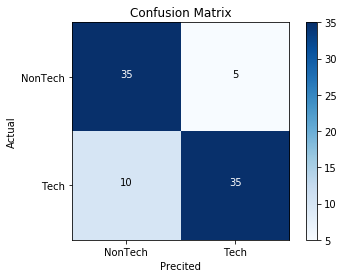

In [343]:
class_labels = ['NonTech', 'Tech']
conmatrix(cm, y_true, class_labels)

In [368]:
# positive class = "NonTech", negative class = "Tech"
tn, fp, fn, tp = cm.ravel()

In [345]:
print('True Positive: {} '.format(tp))
print('False Positive: {} '.format(fp))
print('True Negative: {} '.format(tn))
print('False Negative: {} '.format(fn))

True Positive: 35 
False Positive: 5 
True Negative: 35 
False Negative: 10 


#### Berechnung Accuracy sowie für beide Klassen Precision, Recall und F1-Score. 

In [379]:
def precision(tp, fp):
    return tp/(tp+fp)
    
def recall(tp, fn):
    return tp/(tp+fn)

def accuracy(tp, tn, total):
    return (tp + tn)/total

def f1_score(precision, recall):
    return 2*((precision*recall)/(precision+recall))

In [347]:
print('Precision: {0}'.format(precision(tp, fp)))
print('Recall: {0}'.format(recall(tp, fn)))
print('Accuracy: {0}'.format(accuracy(tp, tn, len(classificationDict))))
print('F1-Score: {0}'.format(f1_score(precision(tp, fp), recall(tp, fn))))

Precision: 0.875
Recall: 0.7777777777777778
Accuracy: 0.8235294117647058
F1-Score: 0.823529411764706


3. Diskutieren Sie das Ergebnis

Die _Confusion Matrix_ ist eine Methode zur Leistungsmessung für Klassifizierungsproblematiken des maschinellen Lernens. Die Ausgabe (engl., _Output_) kann zwischen einer und mehrerer Klassen liegen. 
Visuell dargestellt ist die _Confusion Matrix_ eine Tabelle mit 4 verschiedenen Kombinationen (_TP, FP, FN, TN_) zwischen vorhergesagten und tatsächlichen Werten.

##### Recall
Die Maßzahl des Recall (dt., _Sensitivität_) oder Richtig-Positiv-Rate des Klassifikators erlaubt Aussagen darüber, wie viele Werte korrekt vorhergesagt wurden.

##### Precision
Die Maßzahl der Precision (dt., _Genauigkeit_) ermöglicht eine Aussage darüber, wie viele positiv vorhergesagten Werte tatsächlich der positiven Klasse zugeordnet werden können.

##### Accuracy
Die Maßzahl der Accuracy erlaubt eine Aussage über den Anteil der korrekt klassifizierten Fälle. Bei unausgeglichenen (engl., _biased_) Testdaten wird mit der _Accuracy_ die Effektivität eines Klassifikators nicht mehr erfassbar.  

##### F1-Score
Die Maßzahl des F1-Score ist das harmonische Mittel aus Precision und Recall und wird häufig als zusammenfassende Metrik verwendet. Der F1-Score oder F-Maß ist daher ein guter Indikator für die Genauigkeit der erzielten Ergebnisse von Recall und Precision. 

#### Analyse des Ergebnisses
Anhand der berechneten Werte ist ersichtlich dass die Maßzahlen von Recall (~ 78.0 %), Precision (~ 87.6 %), als auch Accuracy (~ 82.4 %) einen sehr guten Wert nahe des best zu erzielenden Scores von 100% erzielen. Auch die Maßzahl des F1-Score erzielt einen guten Wert (~ 82.4%), der auf eine hohe Genauigkeit und eine gute Abstraktion durch das Model rückschließen lässt. Gleichzeitig ist auch ersichtlich dass mit dem aktuellen Model eine relativ (zur gesamten Anzahl an verwendeten Datensätzen) hohe Zahl an _False Negative_ klassifizierten Wert aus der Klasse "Tech" besteht.

4. Wie könnte die Klassifikationsgüte durch Modifikation der _getwords()_ -Methode verbessert werden? Implementieren Sie diesen Ansatz und vergleichen Sie das Ergebnis mit dem des ersten Ansatzes.

Beim Verbessern der getwords Methode entfernen wir alle Stopwörter und setzen pro Wort den Dictionary-Eintrag auf die Anzahl des Auftretens im Artikel. Gleichzeitig wenden wir den Ansatz von ```ngrams``` an und setzen hier den Wert auf 3.

Weitere Möglichkeiten zur Verbesserung die nicht Implementiert wurden:

    Stemming
    Lemmatisierung
    Rechtschreibkorrektur
    NGramme verwenden um Kontext zu beachten



In [381]:
#!pip install --user -U nltk

from nltk import ngrams
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
#nltk.download('popular')

def getwordsimproved(doc):
    toRet = {}
    #stopwort-Entfernung
    stop_words = set(stopwords.words('german'))
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(doc.lower())
   
    #Implementierung von Bigram
    ngram = True  #atm nicht in nutzung
    if ngram:
        docstring = ' '.join(tokens).strip()
        n = 4
        n_grams = ngrams(docstring.split(), n)
        tokens = tokens + [' '.join(grams) for grams in n_grams]
    
    for token in tokens:
        if not token in stop_words:
            if not token in toRet:
                toRet.update({token : 1})
            else:
                toRet[token] += 1 #Wenn Wort bereits in Dict enthalten +=1
    return toRet

Beispiel der Filterung von Stopwörtern. 

In [370]:
testString = "Dies ist ein Beispielsatz, der die Filterung der Stopwörter darlegen soll."
print(getwordsimproved(testString))

{'beispielsatz': 1, 'filterung': 1, 'stopwörter': 1, 'darlegen': 1, 'dies ist ein beispielsatz': 1, 'ist ein beispielsatz der': 1, 'ein beispielsatz der die': 1, 'beispielsatz der die filterung': 1, 'der die filterung der': 1, 'die filterung der stopwörter': 1, 'filterung der stopwörter darlegen': 1, 'der stopwörter darlegen soll': 1}


##### Anwendung der _getwordsimproved() Methode_
Für eine Vergleichbarkeit wird der obige Versuch mit der Methode _getwordsimproved()_, welche die mehrwertarmen Stoppwörter ergänzend herausfiltert vorgenommen.

In [371]:
training1 = Classifier(getwordsimproved, ['Tech','NonTech'])

for key, value in TextDict.items(): 
    training1.train(key,value)

classificationDict1 = {}

for text in testList:
    
    categorise = training1.categorise(text,"Tech","NonTech")
    
    print(text,"\nGehört zu Klasse: ",categorise)
    print ('---------------------------\n')
    
    classificationDict1.update( {text: categorise} )

Desktop-Betriebssystem: MacOS Big Sur führt neue Oberfläche ein Apples Betriebssystem MacOS Big Sur wurde optisch generalüberholt. Kompakte Icons, andere Layouts und neue Bedienelemente erinnern an iPadOS. ( MacOS ,  Apple )   
Gehört zu Klasse:  Tech
---------------------------

iPad-Betriebssystem: iPadOS 14 macht Platz am Rand iPadOS 14 heißt das neue Betriebssystem für iPads, das mit dem Bildschirmplatz ökonomischer umgeht. So wird die Grenze zu MacOS immer durchlässiger. ( iPad ,  Apple )   
Gehört zu Klasse:  Tech
---------------------------

Mobiles Betriebssystem: iOS 14 erfindet Homescreen, Autoschlüssel und Apps neu Apple hat mit iOS 14 die nächste Generation seines mobilen Betriebssystems für iPhones vorgestellt. ( iOS ,  Apple )   
Gehört zu Klasse:  Tech
---------------------------

End of Life: Flash Player soll sich selbst zerstören Die Software soll einen Selbstzerstörungsmechanismus erhalten und im Jahr 2021 nicht mehr funktionieren. ( Flash ,  Browser )   
Gehört zu K

In [372]:
print("Unsere Klassifizierung: \n",classificationDict1.values())
print ('\n---------------------------\n')
print("Lösungs Klassifizierung:\n",testVerificationDict.values())

Unsere Klassifizierung: 
 dict_values(['Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'NonTech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'NonTech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'NonTech', 'NonTech', 'NonTech', 'Tech', 'NonTech', 'NonTech', 'NonTech', 'Tech', 'Tech', 'Tech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'Tech', 'Tech', 'Tech', 'NonTech', 'NonTech', 'Tech', 'NonTech', 'NonTech', 'Tech', 'NonTech', 'NonTech', 'NonTech', 'Tech', 'NonTech', 'Tech', 'NonTech', 'Tech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'Tech', 'NonTech', 'NonTech', 'Tech', 'NonTech', 'NonTech', 'NonTech'])

---------------------------

Lösungs Klassifizierung:
 dict_values(['Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 

In [373]:
y_true1 = np.array(list(classificationDict1.values()))
y_pred1 = np.array(list(testVerificationDict.values()))
cm1 = confusion_matrix(y_true1, y_pred1, labels=['Tech','NonTech'])

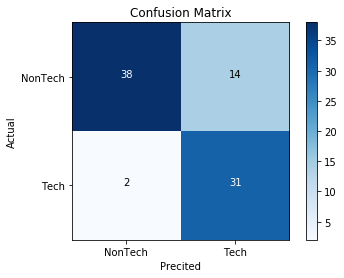

In [374]:
class_labels = ['NonTech', 'Tech']
conmatrix(cm1, y_true1, class_labels)

In [375]:
exp_series1 = pd.Series(y_true1)
pred_series1 = pd.Series(y_pred1)

pd.crosstab(exp_series1, pred_series1, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,NonTech,Tech,All
Actual,,,
NonTech,31,2,33
Tech,14,38,52
All,45,40,85


In [376]:
# positive class = "Tech", negative class = "nonTech"
tn1, fp1, fn1, tp1 = cm1.ravel()

In [377]:
print('True Positive: {} '.format(tp1)) #32
print('False Positive: {} '.format(fp1)) #8
print('True Negative: {} '.format(tn1)) #34
print('False Negative: {} '.format(fn1)) #11

True Positive: 31 
False Positive: 14 
True Negative: 38 
False Negative: 2 


In [380]:
print('Precision: {0}'.format(precision(tp1, fp1)))
print('Recall: {0}'.format(recall(tp1, fn1)))
print('Accuracy: {0}'.format(accuracy(tp1, tn1, len(classificationDict1))))
print('F1-Score: {0}'.format(f1_score(precision(tp1, fp1), recall(tp1, fn1))))

Precision: 0.6888888888888889
Recall: 0.9393939393939394
Accuracy: 0.8117647058823529
F1-Score: 0.7948717948717948


#### Diskussion des Ergebnisses
Beim resultierenden Ergebnis kann man sehen, dass auch bei dem neuen Model ähnlich viele "NonTech" Artikel als _True Positive_, bzw. korrekt als "NonTech" klassifiziert wurden. Gleichzeitig stieg die Zahl der _False Positive_ Werte an. Die größte Veränderung ist bei der Klassifzierung von "Tech" Artikeln zu beobachten. Die Anzahl der _False Negative_ hat sich hierbei stark von 10 auf 2 gesenkt und die _True Negative_ Werte mit der "Tech" Artikel korrekt als "Tech" Artikel klassifiziert wurden, sind ebenso leicht angestiegen. 

Accuracy (~ 81.2%) und Recall (~ 94.3%) verbessern sich, während sich Precision (~ 73.3%) um ca. 10% auf 70% verschlechtert. Insgesamt verbessert sich die Qualität des Classifiers. Dies zeigt sich auch bei der Entwicklung des Wertes des F1-Score (~ 80.5%).

Insgesamt haben die Verbesserungsmaßnahmen zu einer Verbesserung der Klassifizierung der negativen Klasse, hier "Tech" mittels des Models beigetragen.

## Zusatzsaufgabe: Naive Bayes Document Classification
Ziel dieser Exploration ist die Klassifikation von wissenschaftlichen Papers anhand deren Abstract unter der Zuhilfenahme eines _Naive Bayes Classifier_ Algorithmus. Im Folgenden wird eine komplexere Klassifizierungsaufgabe betrachtet, bei der es darum geht den Abstract von _philosophischen_ Artikeln zu klassifizieren. Dabei werden Teildisziplinen gewählt, die sich zwar voneinander unterschieden, jedoch inhaltlich stark überschneiden. Dies betrifft die Bereiche der Erkenntnistheorie und Ethik.


1. Vorbereitung der Trainings- und Testdaten

Die Datenbank welche für die gelabelten Daten verwendet wird heißt _PhilPapers_ und ist unter folgendem Link PhilPapers (https://philpapers.org/) zu finden.
- _Ethics Abstract_ , gefunden unter: https://philpapers.org/browse/varieties-of-virtue-ethics zum Thema "varieties of virtue ethics".
- _Epistemology Abstract_ , gefunden unter: https://philpapers.org/browse/trust zum Thema "trust".

Die Datensätze bestehen aus jeweils 40 Dokument-Datensätzen je Klasse.

In [358]:
import pandas as pd

df_documents = pd.read_csv('../data/csv/trainingdata_z1.csv', sep=";", error_bad_lines=False)
df_documents.head(5)

,abstract,category
0,We examine the following consequentialist view...,Ethics
1,The paper argues that care ethics should be su...,Ethics
2,"In recent years, scholars of Confucian ethics ...",Ethics
3,"Virtue Ethics_ collects, for the first time, t...",Ethics
4,This dissertation integrates the work of femin...,Ethics


Umwandlung von kategorischen (_Ethics, Epistemology_) in numerische Label (_0, 1_). 

In [359]:
df_documents['label'] = df_documents['category'].apply(lambda x: 0 if x=='Epistemology' else 1)
df_documents.head(5)

,abstract,category,label
0,We examine the following consequentialist view...,Ethics,1
1,The paper argues that care ethics should be su...,Ethics,1
2,"In recent years, scholars of Confucian ethics ...",Ethics,1
3,"Virtue Ethics_ collects, for the first time, t...",Ethics,1
4,This dissertation integrates the work of femin...,Ethics,1


2. Auftrennen der Daten in _Training_ und _Test_ Daten
Die Datensätze werden für spätere Testzwecke und Validierung des trainierten Models zurück gehalten

In [360]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_documents['abstract'], df_documents['label'], random_state=1)

3. Konvertierung von _abstract_ Werten in Vektoren mit Anzahl der Wörter

Wie häufig tritt ein Wort in einem Dokument auf?
Wie häufig tritt ein Wort in der jeweiligen Kategorie auf?

Hierfür werden die Strings der Spalte _abstract_ jeweils in Vektoren umgewandelt. Dabei repräsentiert jede Reihe ein Dokument und jede Spalte repräsentiert ein Wort. Sprachelemente wie Zahlen, Artikel, Punktuation oder allgemein als "nonwords" deklarierbare Elemente müssen exkludiert werden, da diese keinen Mehrwert für die Klassifikationsaufgabe liefern. Hierfür werden, wie im oberen Bereich bereits angewandt, sogenannte "Stopwords" herausgefiltert. 


In [361]:
from sklearn.feature_extraction.text import CountVectorizer

# transform vector of words to matrix
cv = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', lowercase=True, stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

Untersuchung der konvertierten Trainings- und Testdaten. 

In [362]:
word_freq_df = pd.DataFrame(X_train_cv.toarray(), columns=cv.get_feature_names())
top_words_df = pd.DataFrame(word_freq_df.sum()).sort_values(0, ascending=False)

Exploration der am häufigsten entdeckten Begriffe/Worte:

Text(0, 0.5, 'Amount of words in documents')

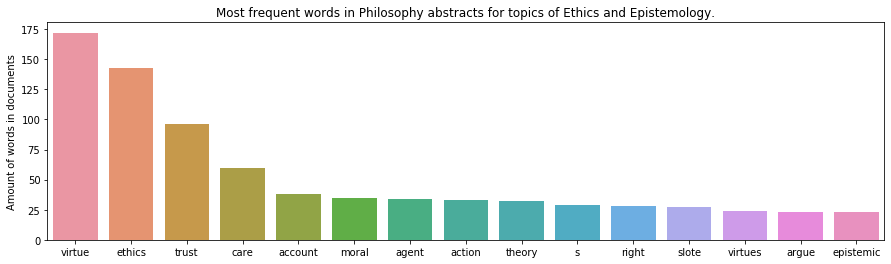

In [363]:
#!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

firstten_df = top_words_df[:15]
# Set the width and height of the figure
plt.figure(figsize=(15,4))
plt.title("Most frequent words in Philosophy abstracts for topics of Ethics and Epistemology.")
sns.barplot(x=firstten_df.index, y=firstten_df.get(0))
plt.ylabel("Amount of words in documents")

Wörter wie "virtue", "ethics", als auch "trust" und "care" sind die am häufigsten vorkommenden Merkmale. Fälschlicher Weise wird hier aber auch "s" als häufig auftretendes Merkmal deklariert. Dies ist ein Merkmal, das keinen Mehrwert einbringt und welches daher in weiteren Schritten bereinigt werden muss, um das Ergebnis des Models noch weiter zu verbessern.

4. Training des _Multinomial Naive Bayes Classifier_ Algorithmus

In [364]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_cv, y_train)
predictions = naive_bayes.predict(X_test_cv)

5. Bewertung des trainierten Models mittels Accuracy, Precision und Recall

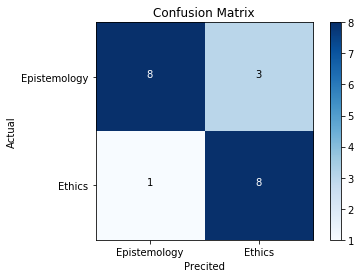

In [365]:
cm2 = confusion_matrix(y_test, predictions)
labels=['Epistemology', 'Ethics']
conmatrix(cm2, y_test, labels)

In [366]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.8
Precision score: 0.7272727272727273
Recall score: 0.8888888888888888
F1 score: 0.7999999999999999


#### Diskussion des Ergebnisses
Insgesamt konnte das trainierte Model einen guten Wert bei Accuracy (~ 80%), Precision (~ 72.3%) als auch Recall (~ 88.9%) erzielen. 
Hierbei konnten durch die Erhöhung von gelabelten Trainingsdaten von je 20 Textdokumenten je Klasse auf ein Dokumenten-Datensatz von 40 je Klasse eine deutliche Verbesserungen in der Generalisierung und Qualität des Models erzielt werden.

6. Untersuchung von _falsch/korrekt_ klassifzierten Labeln

In [367]:
testing_predictions = []
for i in range(len(X_test)):
    if predictions[i] == 1:
        testing_predictions.append('Ethics')
    else:
        testing_predictions.append('Epistemology')
check_df = pd.DataFrame({'actual label': list(y_test), 'prediction': testing_predictions, 'abstract':list(X_test)})
check_df.replace(to_replace=0, value='Epistemology', inplace=True)
check_df.replace(to_replace=1, value='Ethics', inplace=True)

display(check_df)

,actual label,prediction,abstract
0,Epistemology,Epistemology,"“Whatever matters to human beings, trust is th..."
1,Ethics,Ethics,"In Morals From Motives, Michael Slote defends ..."
2,Ethics,Ethics,How do we care well for a human being: ourselv...
3,Epistemology,Ethics,"In this paper, I defend the view that it is wr..."
4,Epistemology,Epistemology,Trust is so intimately linked with faith that ...
5,Epistemology,Epistemology,Most theories of trust presume that trust is a...
6,Epistemology,Epistemology,What makes science trustworthy to the public? ...
7,Epistemology,Epistemology,This volume has its roots in two recent develo...
8,Epistemology,Epistemology,"In this chapter, we consider ethical and philo..."
9,Epistemology,Ethics,"In Book III, Part 2 of the Treatise, Hume pres..."
